In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [3]:
 import nltk
 nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [4]:
import nltk
nltk.download('porterStemmer')

[nltk_data] Error loading porterStemmer: <urlopen error [WinError
[nltk_data]     10060] A connection attempt failed because the
[nltk_data]     connected party did not properly respond after a
[nltk_data]     period of time, or established connection failed
[nltk_data]     because connected host has failed to respond>


False

In [5]:
df = pd.read_csv(r"C:\Users\TUFF\Downloads\chatgpt1.csv\chatgpt1.csv")

In [6]:
df.head()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2023-01-22 13:44:34+00:00,1617156270871699456,ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...,mochico0123,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/mochico0123,NaN,NaN,1,0,5,0,1617156270871699456,ja,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0
1,2023-01-22 13:44:39+00:00,1617156291046133761,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,https://twitter.com/Caput_LupinumSG,NaN,NaN,1,0,5,0,1617148639993806848,en,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,"[User(username='AlexandrovnaIng', id=282705900...",[],0
2,2023-01-22 13:44:44+00:00,1617156308926349312,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,4,0,1617156308926349312,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1
3,2023-01-22 13:44:49+00:00,1617156332297256961,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,['https://twitter.com/agadmator/status/1617155...,['https://t.co/ENTSzi2AQ9'],0,0,2,0,1617156332297256961,en,"<a href=""http://twitter.com/download/android"" ...",NaN,https://twitter.com/agadmator/status/161715501...,NaN,[],0
4,2023-01-22 13:44:52+00:00,1617156345064570880,"Profilinde vatan, Türkiye falan yazan bireyler...",0xGenetikciniz,https://twitter.com/0xGenetikciniz/status/1617...,https://twitter.com/0xGenetikciniz,NaN,NaN,0,0,4,0,1617156345064570880,tr,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Datetime        50001 non-null  object
 1   Tweet Id        50001 non-null  int64 
 2   Text            50001 non-null  object
 3   Username        50001 non-null  object
 4   Permalink       50001 non-null  object
 5   User            50001 non-null  object
 6   Outlinks        19942 non-null  object
 7   CountLinks      19942 non-null  object
 8   ReplyCount      50001 non-null  int64 
 9   RetweetCount    50001 non-null  int64 
 10  LikeCount       50001 non-null  int64 
 11  QuoteCount      50001 non-null  int64 
 12  ConversationId  50001 non-null  int64 
 13  Language        50001 non-null  object
 14  Source          50001 non-null  object
 15  Media           9502 non-null   object
 16  QuotedTweet     3563 non-null   object
 17  MentionedUsers  17169 non-null  object
 18  hashta

In [8]:
df.columns

Index(['Datetime', 'Tweet Id', 'Text', 'Username', 'Permalink', 'User',
       'Outlinks', 'CountLinks', 'ReplyCount', 'RetweetCount', 'LikeCount',
       'QuoteCount', 'ConversationId', 'Language', 'Source', 'Media',
       'QuotedTweet', 'MentionedUsers', 'hashtag', 'hastag_counts'],
      dtype='object')

In [9]:
text_df = df.drop(['Datetime', 'Tweet Id', 'Username', 'Permalink', 'User',
       'Outlinks', 'CountLinks', 'ReplyCount', 'RetweetCount', 'LikeCount',
       'QuoteCount', 'ConversationId', 'Language', 'Source', 'Media',
       'QuotedTweet', 'MentionedUsers', 'hashtag', 'hastag_counts'], axis=1)
text_df.head()

,Text
0,ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...
1,@AlexandrovnaIng Prohibition of ChatGPT has be...
2,"Schaut Euch an, was @fobizz @DianaKnodel alles..."
3,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...
4,"Profilinde vatan, Türkiye falan yazan bireyler..."


In [10]:
print(text_df['Text'].iloc[0],"\n")
print(text_df['Text'].iloc[1],"\n")
print(text_df['Text'].iloc[2],"\n")
print(text_df['Text'].iloc[3],"\n")
print(text_df['Text'].iloc[4],"\n")

ChatGPTで遊ぶの忘れてた！！
書類作るコード書いてみてほしいのと、
どこまで思考整理付き合ってくれるのかと、
ウミガメのスープやってみたい。
あとは調べ物してくれ。
事務所でちょいといじったが、とりあえず色々やってみたい。 

@AlexandrovnaIng Prohibition of ChatGPT has been added to the honor code of my daughter’s school 

Schaut Euch an, was @fobizz @DianaKnodel alles ⬇️ auf die Piste bringt, um Euch mitzunehmen. 

Morgen startet @reg_schulz - und am Di um 12 besprechen wir #ChatGPT als kritische FreundInnen im Live-Briefing mit SPD-Vorsitzender @EskenSaskia &amp; Diana
https://t.co/DsoeVJrPBp https://t.co/HflTruResk https://t.co/7tYCx6Srp8 

Bow down to chatGPT 🫡..... https://t.co/ENTSzi2AQ9 

Profilinde vatan, Türkiye falan yazan bireylerin ilk koruduğu şey ülkenin dini falan. Asla şaşmaz bu. Chatgpt yaz bunu bi kenara 😂 



In [11]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    50001 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB


In [12]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+",'',text,flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [13]:
text_df.Text = text_df['Text'].apply(data_processing)

In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [15]:
text_df = text_df.drop_duplicates('Text')

In [16]:
from nltk.stem import PorterStemmer

In [17]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [18]:
text_df['Text'] = text_df['Text'].apply(lambda x: stemming(x))

In [19]:
text_df.head()

,Text
0,chatgptで遊ぶの忘れてた 書類作るコード書いてみてほしいのと どこまで思考整理付き合っ...
1,alexandrovnaing prohibition chatgpt added hono...
2,schaut euch fobizz dianaknodel alles auf die p...
3,bow chatgpt
4,profilinde vatan türkiye falan yazan bireyleri...


In [20]:
print(text_df['Text'].iloc[0],"\n")
print(text_df['Text'].iloc[1],"\n")
print(text_df['Text'].iloc[2],"\n")
print(text_df['Text'].iloc[3],"\n")
print(text_df['Text'].iloc[4],"\n")

chatgptで遊ぶの忘れてた 書類作るコード書いてみてほしいのと どこまで思考整理付き合ってくれるのかと ウミガメのスープやってみたい あとは調べ物してくれ 事務所でちょいといじったがとりあえず色々やってみたい 

alexandrovnaing prohibition chatgpt added honor code daughters school 

schaut euch fobizz dianaknodel alles auf die piste bringt um euch mitzunehmen morgen startet reg_schulz und di um 12 besprechen wir chatgpt als kritische freundinnen im livebriefing mit spdvorsitzender eskensaskia amp diana 

bow chatgpt 

profilinde vatan türkiye falan yazan bireylerin ilk koruduğu şey ülkenin dini falan asla şaşmaz bu chatgpt yaz bunu bi kenara 



In [21]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45123 entries, 0 to 50000
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    45123 non-null  object
dtypes: object(1)
memory usage: 705.0+ KB


In [22]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [23]:
text_df['polarity'] = text_df['Text'].apply(polarity)

In [24]:
text_df.head(10)

,Text,polarity
0,chatgptで遊ぶの忘れてた 書類作るコード書いてみてほしいのと どこまで思考整理付き合っ...,0.000000
1,alexandrovnaing prohibition chatgpt added hono...,0.000000
2,schaut euch fobizz dianaknodel alles auf die p...,0.000000
3,bow chatgpt,0.000000
4,profilinde vatan türkiye falan yazan bireyleri...,0.000000
5,chatgptnin bilinmeyen arka planı ucuz iş gücü ...,0.000000
6,chatgpt runs 10k nvidia training gpus potentia...,0.000000
7,swengdad repetitive work every job lots small ...,-0.083333
8,created fictional jewelry brand using chatgpt ...,0.000000
9,look similar irobot company install mini fridg...,0.300000


In [25]:
def sentiment(label):
    if label <0:
        return "negative"
    elif label ==0:
        return "neutral"
    elif label >0:
        return "positive"

In [26]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [27]:
text_df.head()

,Text,polarity,sentiment
0,chatgptで遊ぶの忘れてた 書類作るコード書いてみてほしいのと どこまで思考整理付き合っ...,0.0,neutral
1,alexandrovnaing prohibition chatgpt added hono...,0.0,neutral
2,schaut euch fobizz dianaknodel alles auf die p...,0.0,neutral
3,bow chatgpt,0.0,neutral
4,profilinde vatan türkiye falan yazan bireyleri...,0.0,neutral


<Axes: xlabel='sentiment', ylabel='count'>

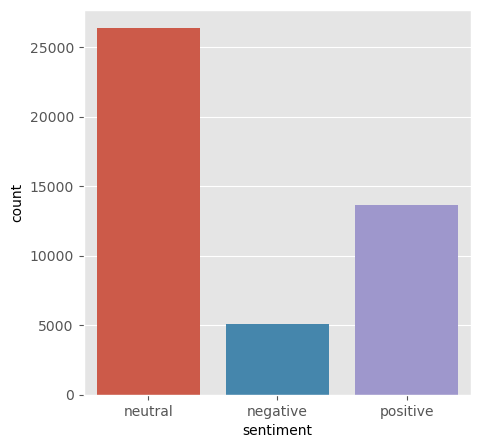

In [28]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment',data = text_df)

Text(0.5, 1.0, 'distribution of seentiments')

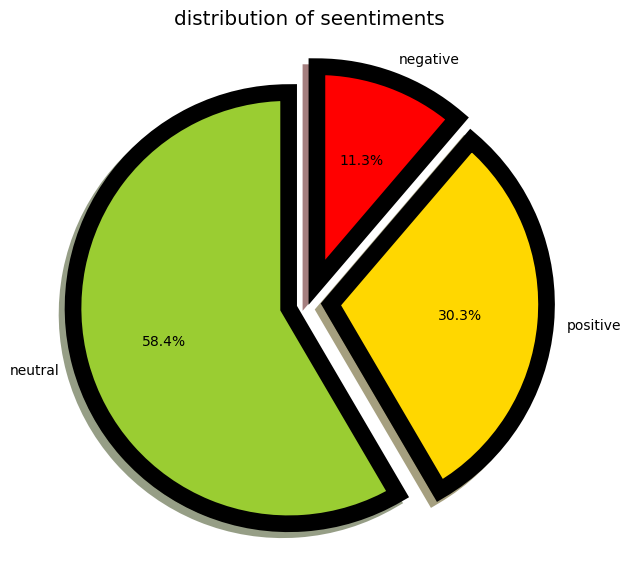

In [29]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen","gold","red")
wp = {'linewidth':12, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,startangle=90,wedgeprops = wp,explode = explode, label='')
plt.title('distribution of seentiments')

In [30]:
pos_tweets = text_df[text_df.sentiment == 'positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,Text,polarity,sentiment
16734,aku dah try chatgpt im impressed,1.0,positive
29161,best stand comedian chatgpt,1.0,positive
32083,dont follow chatgpt blindly superb abut perfec...,1.0,positive
6735,shareensingh8 could disagree chatgpt best teac...,1.0,positive
25632,andrewyang stephenmarche generate paragraphs g...,1.0,positive


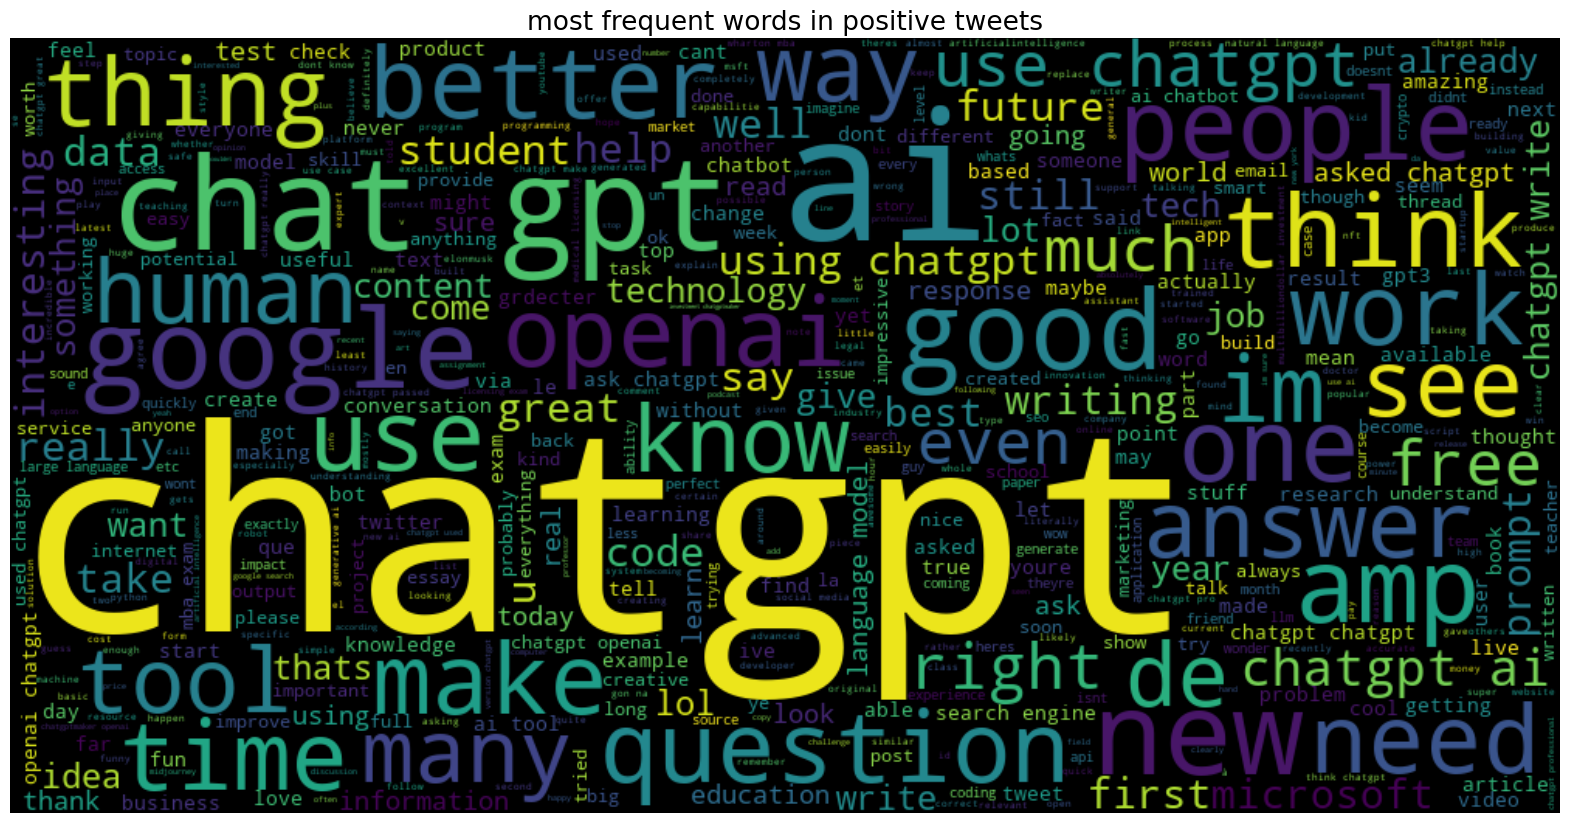

In [31]:
text = ' '.join([ word for word in pos_tweets['Text']])
plt.figure(figsize=(20,15), facecolor='none')
wordcloud = WordCloud(max_words=500, width=1000, height=500).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('most frequent words in positive tweets', fontsize=19)
plt.show()

In [32]:
neg_tweets = text_df[text_df.sentiment == 'negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,Text,polarity,sentiment
12313,googles search engine become heavy censorship ...,-9.251859e-18,negative
9934,infrecursion1 sethbannon sama cant test neithe...,-9.251859e-18,negative
37686,microsoft confirms multibillion dollar investm...,-1.387779e-17,negative
16869,chatgpt scary good elon musk tony stark elon,-1.850372e-17,negative
3610,despite google slow respond success chatgpt co...,-1.850372e-17,negative


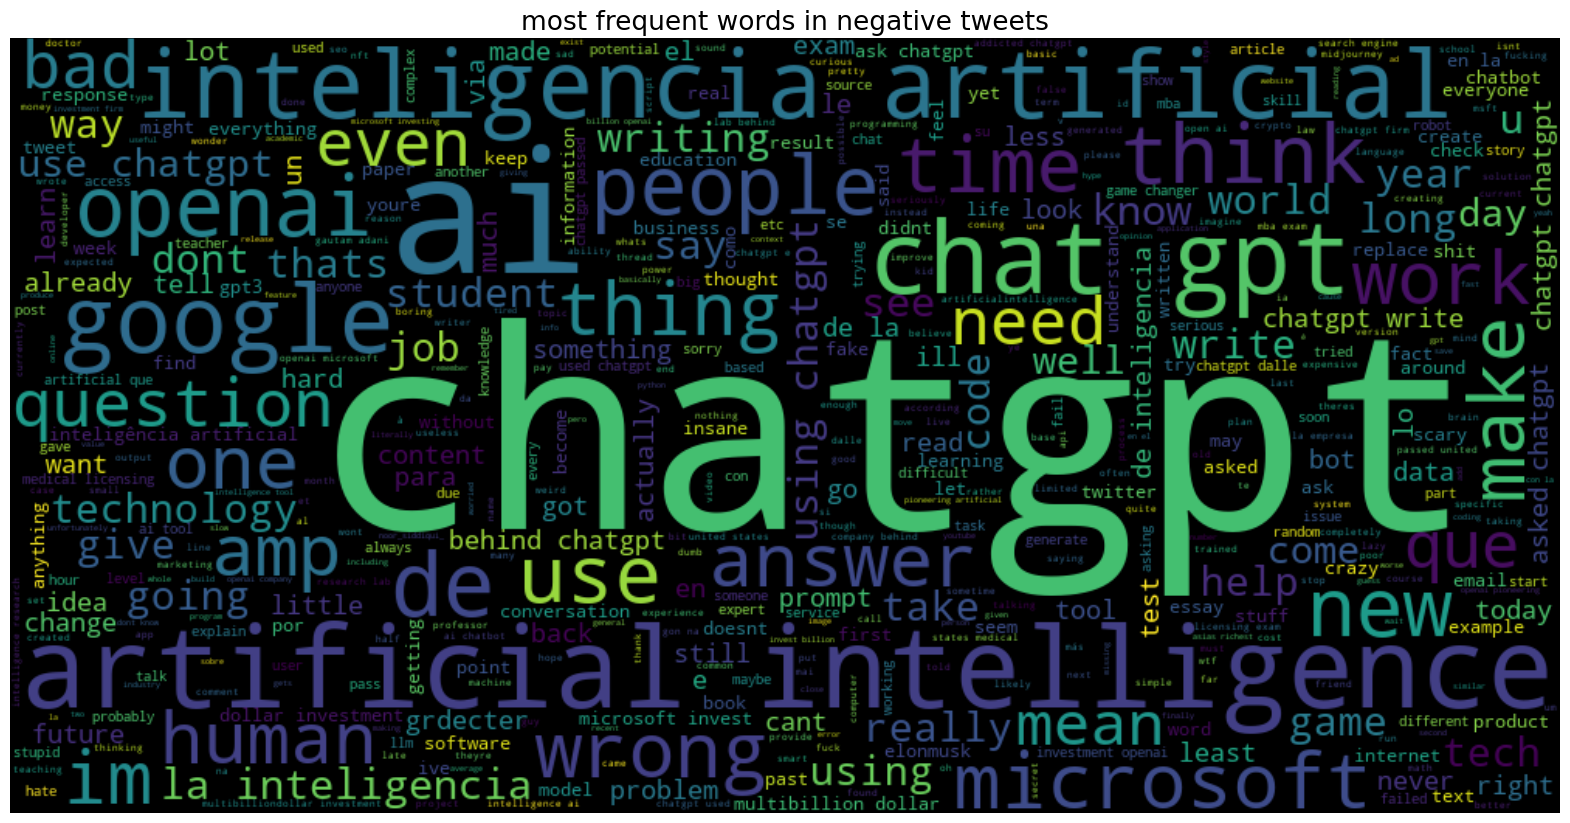

In [33]:
text = ' '.join([ word for word in neg_tweets['Text']])
plt.figure(figsize=(20,15), facecolor='none')
wordcloud = WordCloud(max_words=500, width=1000, height=500).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('most frequent words in negative tweets', fontsize=19)
plt.show()

In [34]:
neutral_tweets = text_df[text_df.sentiment == 'neutral']
neutral_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,Text,polarity,sentiment
12313,googles search engine become heavy censorship ...,-9.251859e-18,negative
9934,infrecursion1 sethbannon sama cant test neithe...,-9.251859e-18,negative
37686,microsoft confirms multibillion dollar investm...,-1.387779e-17,negative
16869,chatgpt scary good elon musk tony stark elon,-1.850372e-17,negative
3610,despite google slow respond success chatgpt co...,-1.850372e-17,negative


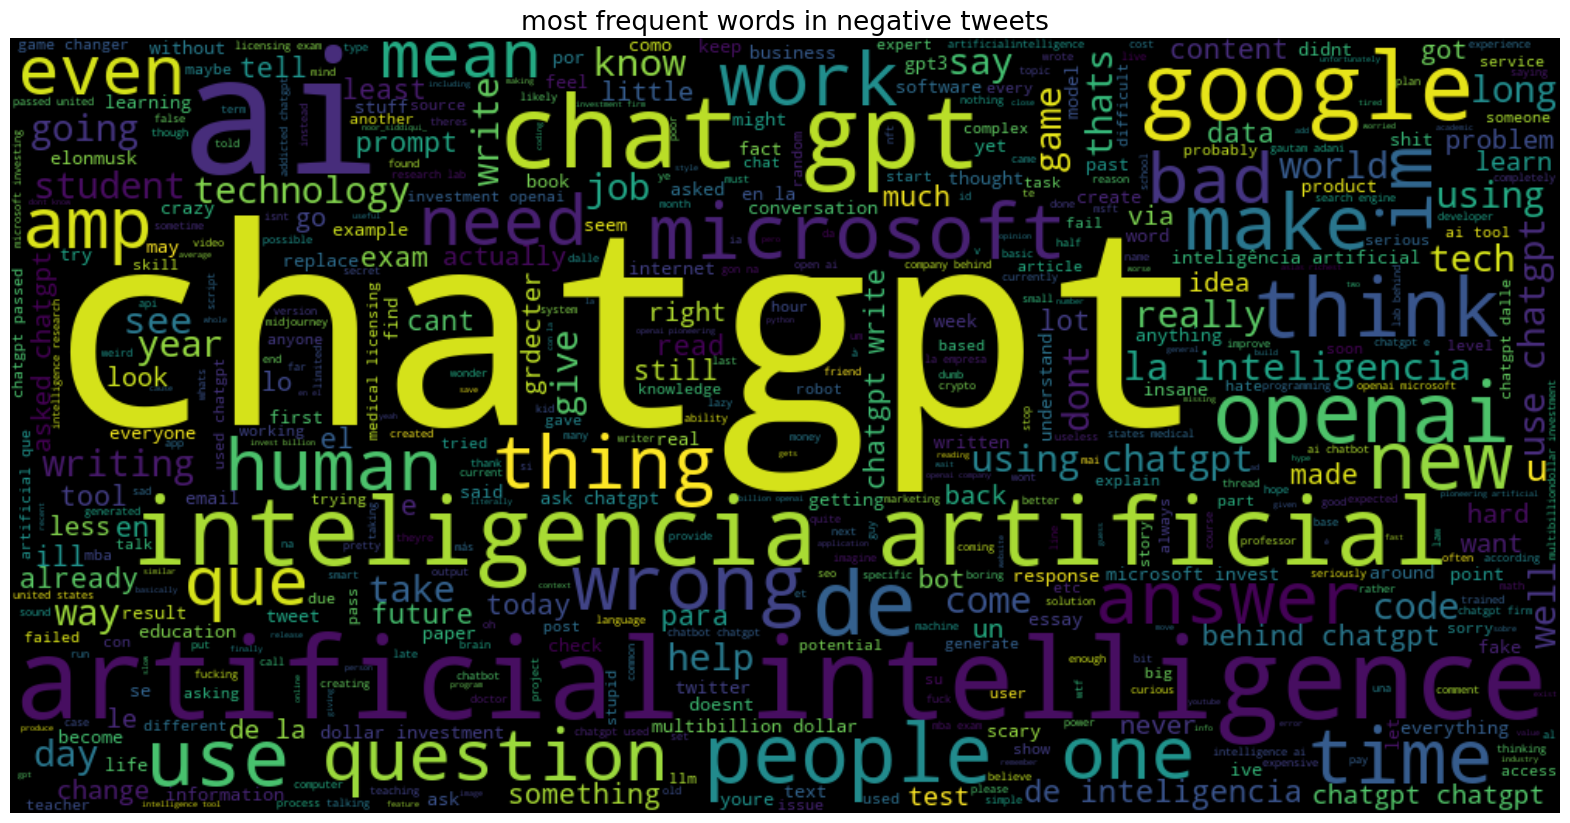

In [35]:
text = ' '.join([ word for word in neutral_tweets['Text']])
plt.figure(figsize=(20,15), facecolor='none')
wordcloud = WordCloud(max_words=500, width=1000, height=500).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('most frequent words in negative tweets', fontsize=19)
plt.show()

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['Text'])

In [38]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 484812

First 20 features:
 ['000' '000 emplois' '000 employés' '000 euros' '000 firewalls'
 '000 milliards' '000 nikos' '000 par' '000 personnes' '000 pracowników'
 '000 salariés' '000 staff' '000 utilisateurs' '000 voix' '000 workers'
 '0000' '0000 million' '0000012' '0000012 per' '00000218']


In [39]:
x = text_df['Text']
y = text_df['sentiment']
x = vect.transform(x)

In [40]:
x_train, x_test , y_train , y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [41]:
print('Size of x_train:',(x_train.shape))
print('Size of y_train:',(y_train.shape))
print('Size of x_test:',(x_test.shape))
print('Size of y_test:',(y_test.shape))

Size of x_train: (36098, 484812)
Size of y_train: (36098,)
Size of x_test: (9025, 484812)
Size of y_test: (9025,)


In [42]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred,y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 91.12%


In [44]:
print(confusion_matrix(y_test , logreg_pred))
print("\n")
print(classification_report(y_test,logreg_pred))

[[ 674  228  148]
 [  16 5156   74]
 [  65  270 2394]]


              precision    recall  f1-score   support

    negative       0.89      0.64      0.75      1050
     neutral       0.91      0.98      0.95      5246
    positive       0.92      0.88      0.90      2729

    accuracy                           0.91      9025
   macro avg       0.91      0.83      0.86      9025
weighted avg       0.91      0.91      0.91      9025



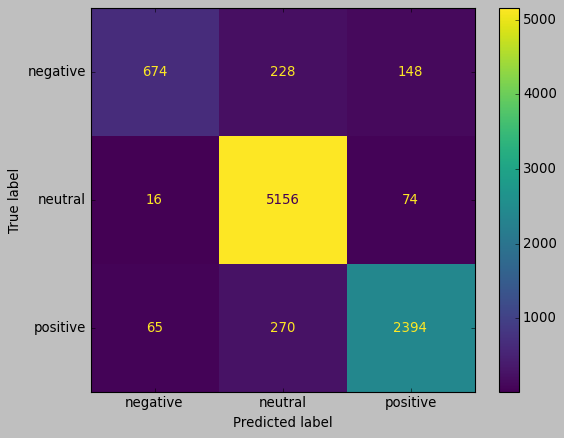

In [45]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
param_grid={'C':[0.001,0.01,0.1,1,10]}
grid = GridSearchCV(LogisticRegression(),param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [50]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [51]:
y_pred = grid.predict(x_test)

In [52]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:2f}%".format(logreg_acc*100))

Test accuracy: 92.221607%


In [54]:
print(confusion_matrix(y_test, logreg_pred))
print('\n')
print(classification_report(y_test , logreg_pred))

[[ 674  228  148]
 [  16 5156   74]
 [  65  270 2394]]


              precision    recall  f1-score   support

    negative       0.89      0.64      0.75      1050
     neutral       0.91      0.98      0.95      5246
    positive       0.92      0.88      0.90      2729

    accuracy                           0.91      9025
   macro avg       0.91      0.83      0.86      9025
weighted avg       0.91      0.91      0.91      9025



In [55]:
from sklearn.svm import LinearSVC

In [56]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [57]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 93.34%


In [58]:
print(confusion_matrix(y_test,svc_pred))
print("\n")
print(classification_report(y_test,svc_pred))

[[ 742  176  132]
 [  10 5197   39]
 [  67  177 2485]]


              precision    recall  f1-score   support

    negative       0.91      0.71      0.79      1050
     neutral       0.94      0.99      0.96      5246
    positive       0.94      0.91      0.92      2729

    accuracy                           0.93      9025
   macro avg       0.93      0.87      0.89      9025
weighted avg       0.93      0.93      0.93      9025



In [59]:
grid = { 
    'C':[0.01,0.1,1,10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [60]:
print("Best parameter:",grid.best_params_)

Best parameter: {'C': 10}


In [61]:
y_pred = grid.predict(x_test)

In [62]:
logreg_acc = accuracy_score(y_pred,y_test)
print("Test accuracy: {:2f}%".format(logreg_acc*100))

Test accuracy: 93.506925%


In [63]:
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 751  168  131]
 [  10 5198   38]
 [  68  171 2490]]


              precision    recall  f1-score   support

    negative       0.91      0.72      0.80      1050
     neutral       0.94      0.99      0.96      5246
    positive       0.94      0.91      0.92      2729

    accuracy                           0.94      9025
   macro avg       0.93      0.87      0.90      9025
weighted avg       0.93      0.94      0.93      9025

